# Links to Dataset

###### Kaggle Dataset - https://www.kaggle.com/datasets/sanjanchaudhari/employees-performance-for-hr-analytics

# Importing Modules

In [1]:
import pypyodbc as odbc
import pandas as pd

# Linking to SQL Database and Converting to Pandas Dataframe

## Linking to SQL Database

In [2]:
DRIVER_NAME = "SQL Server"
SERVER_NAME = "LAPTOP-CT9C24F3"
DATABASE_NAME = "HR Analytics"

connection_string = f"""
    DRIVER={{{DRIVER_NAME}}};
    SERVER={SERVER_NAME};
    DATABASE={DATABASE_NAME};
    Trust_Connection=yes;
"""

In [3]:
conn = odbc.connect(connection_string)
cursor = conn.cursor()

### Making an empty Dataframe with the SQL Dataset Headers

In [4]:
res = cursor.execute("SELECT * FROM sys.columns WHERE object_id = OBJECT_ID('Employees')")

headers = []
for i in res:
    headers.append(i[1])

df = pd.DataFrame(columns=headers)
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met_more_than_80,awards_won,avg_training_score


### Populating the Dataframe with SQL Dataset

In [5]:
res = cursor.execute("SELECT * FROM Employees")

column_lists = []
for header in headers:
    column_lists.append([])

for i in res:
    n = 0
    for j in i:
        new_list = list(column_lists[n])
        new_list.append(j)
        column_lists[n] = new_list
        n += 1

In [6]:
n = 0
for column in column_lists:
    df[df[df.columns[n]].name] = column
    n += 1

df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met_more_than_80,awards_won,avg_training_score
0,78283.0,Operations,region_12,Bachelors,f,sourcing,1.0,28.0,3.0,4.0,0.0,0.0,57.0
1,7656.0,Sales & Marketing,region_10,Masters & above,m,other,1.0,46.0,4.0,4.0,1.0,0.0,59.0
2,5143.0,Operations,region_29,Bachelors,m,sourcing,1.0,35.0,4.0,6.0,1.0,0.0,64.0
3,2981.0,Operations,region_9,Bachelors,f,sourcing,1.0,36.0,5.0,8.0,1.0,0.0,59.0
4,40452.0,Sales & Marketing,region_22,Masters & above,m,sourcing,1.0,53.0,3.0,17.0,0.0,0.0,47.0


# Data Analysis

In [7]:
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met_more_than_80,awards_won,avg_training_score
0,78283.0,Operations,region_12,Bachelors,f,sourcing,1.0,28.0,3.0,4.0,0.0,0.0,57.0
1,7656.0,Sales & Marketing,region_10,Masters & above,m,other,1.0,46.0,4.0,4.0,1.0,0.0,59.0
2,5143.0,Operations,region_29,Bachelors,m,sourcing,1.0,35.0,4.0,6.0,1.0,0.0,64.0
3,2981.0,Operations,region_9,Bachelors,f,sourcing,1.0,36.0,5.0,8.0,1.0,0.0,59.0
4,40452.0,Sales & Marketing,region_22,Masters & above,m,sourcing,1.0,53.0,3.0,17.0,0.0,0.0,47.0


## Data Cleaning

In [8]:
df.shape

(17417, 13)

In [9]:
df_cleaned = df.dropna()
df_cleaned = df.drop_duplicates()

In [10]:
df_cleaned.shape

(17415, 13)

## Data Exploration

#### Datatypes

In [11]:
df.dtypes

employee_id              float64
department                object
region                    object
education                 object
gender                    object
recruitment_channel       object
no_of_trainings          float64
age                      float64
previous_year_rating     float64
length_of_service        float64
KPIs_met_more_than_80    float64
awards_won               float64
avg_training_score       float64
dtype: object

#### Departments

In [12]:
df_cleaned["department"].unique()

array(['Operations', 'Sales & Marketing', 'Technology', 'Procurement',
       'Finance', 'Analytics', 'HR', 'Legal', 'R&D'], dtype=object)

#### Education

In [13]:
df_cleaned["education"].unique()

array(['Bachelors', 'Masters & above', None, 'Below Secondary'],
      dtype=object)

#### Gender

In [14]:
df_cleaned["gender"].unique()

array(['f', 'm'], dtype=object)

#### Recruitment Channel

In [15]:
df_cleaned["recruitment_channel"].unique()

array(['sourcing', 'other', 'referred'], dtype=object)

## Data Analysis

### Creation of Dataframes for easy Analysis

In [16]:
departmentsDF = pd.DataFrame()
departmentsDF["Departments"] = []
departmentsDF["Total Count"] = []
departmentsDF["Count as Percentage of Grand Total"] = []
departmentsDF["Bachelors Count"] = []
departmentsDF["Percentage of Bachelors"] = []
departmentsDF["Masters & above Count"] = []
departmentsDF["Percentage of Masters & above"] = []
departmentsDF["Below Secondary Count"] = []
departmentsDF["Percentage of Below Secondary"] = []
departmentsDF["Male Count"] = []
departmentsDF["Percentage of Males"] = []
departmentsDF["Female Count"] = []
departmentsDF["Percentage of Females"] = []
departmentsDF["Sourcing Count"] = []
departmentsDF["Percentage of Sourcing"] = []
departmentsDF["Referred Count"] = []
departmentsDF["Percentage of Referred"] = []
departmentsDF["Other Count"] = []
departmentsDF["Percentage of Other"] = []
departmentsDF["Mean Number of Trainings"] = []
departmentsDF["Mean Age"] = []
departmentsDF["Mean Previous Year Rating"] = []
departmentsDF["Mean Length of Service"] = []
departmentsDF["Sum of KPIs Met more than 80"] = []
departmentsDF["Sum of Awards Won"] = []
departmentsDF["Mean Average Training Score"] = []

In [17]:
departments = df_cleaned["department"].unique()

for department in departments:
    department_count = len(df_cleaned[df_cleaned["department"] == department])
    department_percent_GT = (department_count/len(df_cleaned)) * 100
    bachelor_count = len(df_cleaned[(df_cleaned["department"] == department) & (df_cleaned["education"] == "Bachelors")])
    bachelor_percent = (bachelor_count/department_count) * 100
    masters_count = len(df_cleaned[(df_cleaned["department"] == department) & (df_cleaned["education"] == "Masters & above")])
    masters_percent = (masters_count/department_count) * 100
    secondary_count = len(df_cleaned[(df_cleaned["department"] == department) & (df_cleaned["education"] == "Below Secondary")])
    secondary_percent = (secondary_count/department_count) * 100
    male_count = len(df_cleaned[(df_cleaned["department"] == department) & (df_cleaned["gender"] == "m")])
    male_percent = (male_count/department_count) * 100
    female_count = len(df_cleaned[(df_cleaned["department"] == department) & (df_cleaned["gender"] == "f")])
    female_percent = (female_count/department_count) * 100
    sourcing_count = len(df_cleaned[(df_cleaned["department"] == department) & (df_cleaned["recruitment_channel"] == "sourcing")])
    sourcing_percent = (sourcing_count/department_count) * 100
    referred_count = len(df_cleaned[(df_cleaned["department"] == department) & (df_cleaned["recruitment_channel"] == "referred")])
    referred_percent = (referred_count/department_count) * 100
    other_count = len(df_cleaned[(df_cleaned["department"] == department) & (df_cleaned["recruitment_channel"] == "other")])
    other_percent = (other_count/department_count) * 100
    mean_trainings = df_cleaned.loc[df_cleaned["department"] == department, "no_of_trainings"].mean()
    mean_age = df_cleaned.loc[df_cleaned["department"] == department, "age"].mean()
    mean_previous = df_cleaned.loc[df_cleaned["department"] == department, "previous_year_rating"].mean()
    mean_service = df_cleaned.loc[df_cleaned["department"] == department, "length_of_service"].mean()
    sum_KPI = df_cleaned.loc[df_cleaned["department"] == department, "KPIs_met_more_than_80"].sum()
    sum_awards = df_cleaned.loc[df_cleaned["department"] == department, "awards_won"].sum()
    mean_score = df_cleaned.loc[df_cleaned["department"] == department, "avg_training_score"].mean()

    row = [department, department_count, department_percent_GT, 
           bachelor_count, bachelor_percent, masters_count, masters_percent, secondary_count, secondary_percent, 
           male_count, male_percent, female_count, female_percent, 
           sourcing_count, sourcing_percent, referred_count, referred_percent, other_count, other_percent, 
           mean_trainings, mean_age, mean_previous, mean_service, sum_KPI, sum_awards, mean_score]
    departmentsDF.loc[len(departmentsDF)] = row

departmentsDF = departmentsDF.round(2)
departmentsDF.head()

,Departments,Total Count,Count as Percentage of Grand Total,Bachelors Count,Percentage of Bachelors,Masters & above Count,Percentage of Masters & above,Below Secondary Count,Percentage of Below Secondary,Male Count,...,Percentage of Referred,Other Count,Percentage of Other,Mean Number of Trainings,Mean Age,Mean Previous Year Rating,Mean Length of Service,Sum of KPIs Met more than 80,Sum of Awards Won,Mean Average Training Score
0,Operations,3524,20.24,2442,69.30,964,27.36,52,1.48,2062,...,1.76,1938,54.99,1.17,36.15,3.66,6.43,1553.0,89.0,60.35
1,Sales & Marketing,5458,31.34,3600,65.96,1357,24.86,0,0.00,4435,...,1.23,3039,55.68,1.26,34.63,3.11,5.75,1513.0,120.0,50.06
2,Technology,2199,12.63,1381,62.80,716,32.56,70,3.18,1348,...,4.27,1228,55.84,1.25,35.03,3.16,5.84,783.0,58.0,79.85
3,Procurement,2240,12.86,1325,59.15,828,36.96,58,2.59,1230,...,0.89,1295,57.81,1.34,36.17,3.25,6.19,836.0,57.0,70.18
4,Finance,802,4.61,576,71.82,177,22.07,37,4.61,600,...,0.25,457,56.98,1.32,32.60,3.54,5.01,319.0,15.0,60.33


In [45]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
male_vs_femaleDF = df_cleaned[["department", "gender"]]
male_vs_femaleDF = male_vs_femaleDF.drop_duplicates()
male_vs_femaleDF = male_vs_femaleDF.reset_index()
male_vs_femaleDF["Gender Percentage"] = np.NaN

In [46]:
n = 0
for index, row in male_vs_femaleDF.iterrows():
    department = row["department"]
    if row["gender"] == "m":
        male_vs_femaleDF["Gender Percentage"][n] = departmentsDF.loc[departmentsDF["Departments"] == department, "Percentage of Males"].iloc[0]
    else:
        male_vs_femaleDF["Gender Percentage"][n] = departmentsDF.loc[departmentsDF["Departments"] == department, "Percentage of Females"].iloc[0]
    n += 1

In [47]:

male_vs_femaleDF = male_vs_femaleDF.sort_values(by=["department", "gender"])
male_vs_femaleDF

,index,department,gender,Gender Percentage
15,127,Analytics,f,9.37
9,48,Analytics,m,90.63
14,114,Finance,f,25.19
8,32,Finance,m,74.81
11,60,HR,f,41.64
10,58,HR,m,58.36
17,1494,Legal,f,9.34
12,75,Legal,m,90.66
0,0,Operations,f,41.49
2,2,Operations,m,58.51


### Visualisations

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='Departments', ylabel='Total Count'>

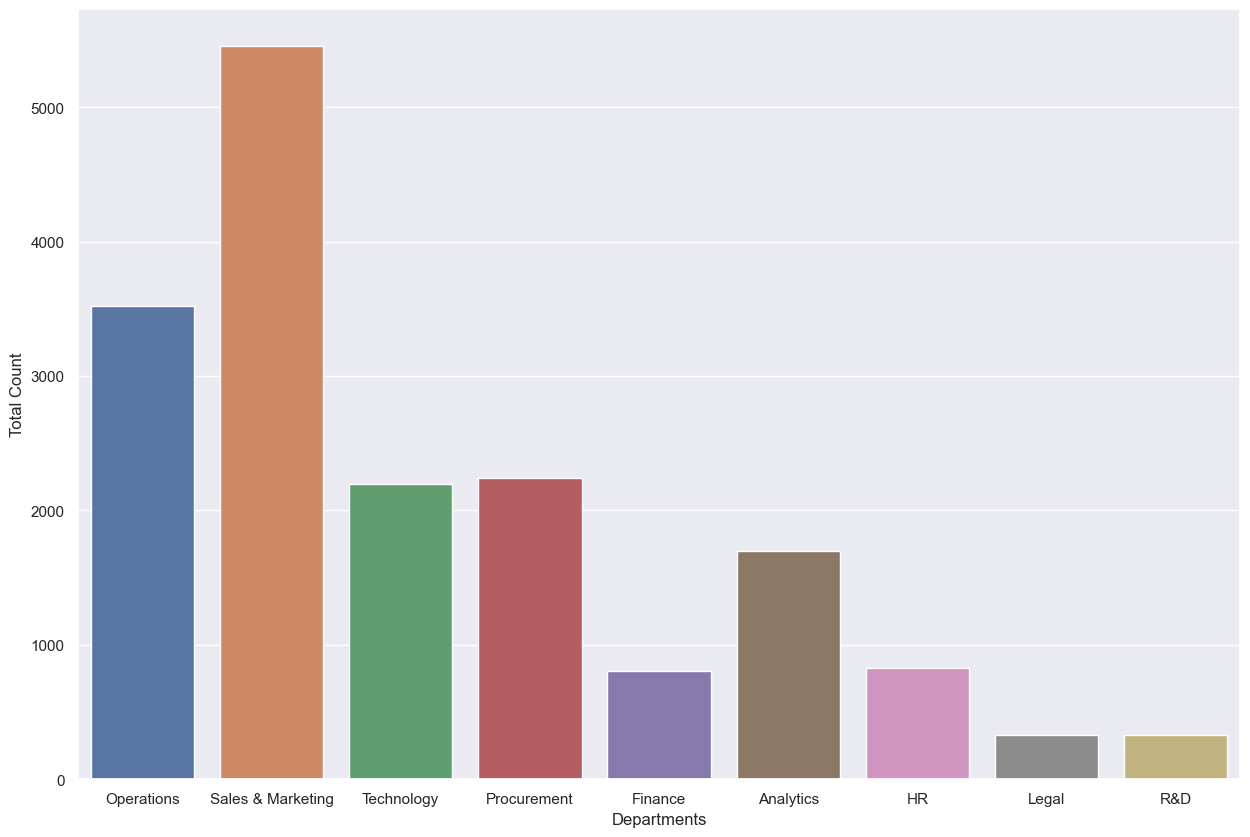

In [49]:
sns.set(rc={'figure.figsize':(15, 10)})
sns.barplot(data=departmentsDF, x="Departments", y="Total Count")

([<matplotlib.patches.Wedge at 0x1a66108f220>,
 [Text(-0.5846408846961502, 0.9317698406482704, 'Percentage of Bachelors'),
  Text(0.49915170041254403, -0.980228330530834, 'Percentage of Masters & above'),
  Text(1.095610621731716, -0.09817008479492487, 'Percentage of Below Secondary')],
 [Text(-0.3188950280160819, 0.5082380948990565, '68%'),
  Text(0.27226456386138764, -0.534669998471364, '29%'),
  Text(0.5976057936718451, -0.05354731897904993, '3%')])

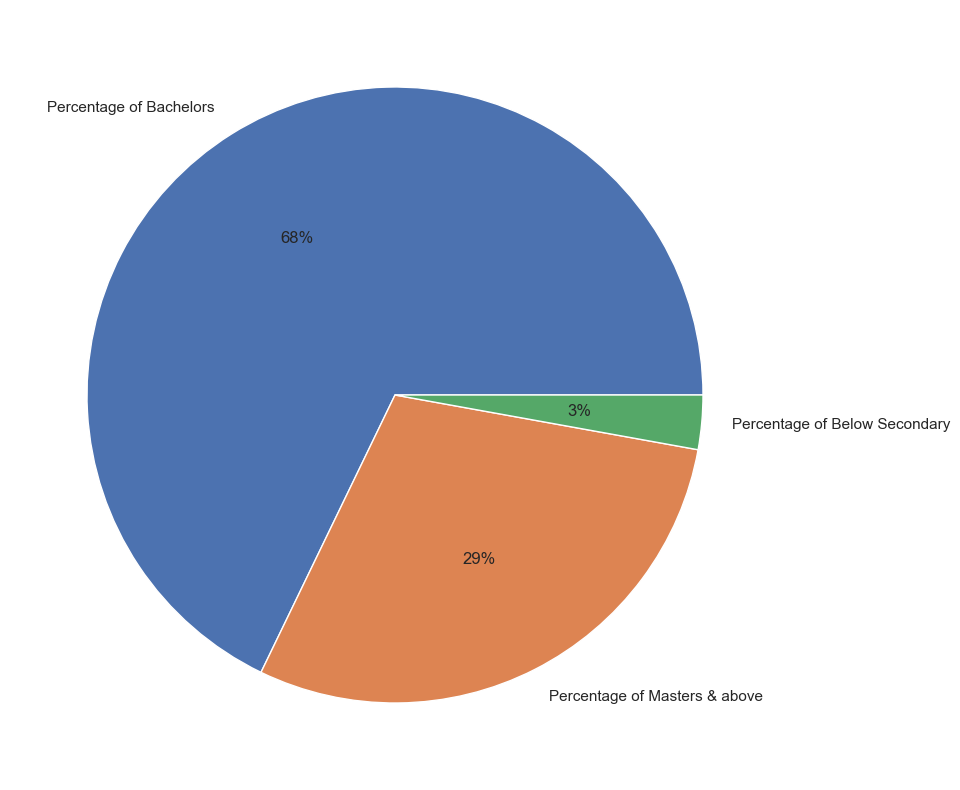

In [50]:
data = [departmentsDF["Percentage of Bachelors"].mean(), departmentsDF["Percentage of Masters & above"].mean(), departmentsDF["Percentage of Below Secondary"].mean()]
labels = ["Percentage of Bachelors", "Percentage of Masters & above", "Percentage of Below Secondary"]
plt.pie(data, labels = labels, autopct='%.0f%%')

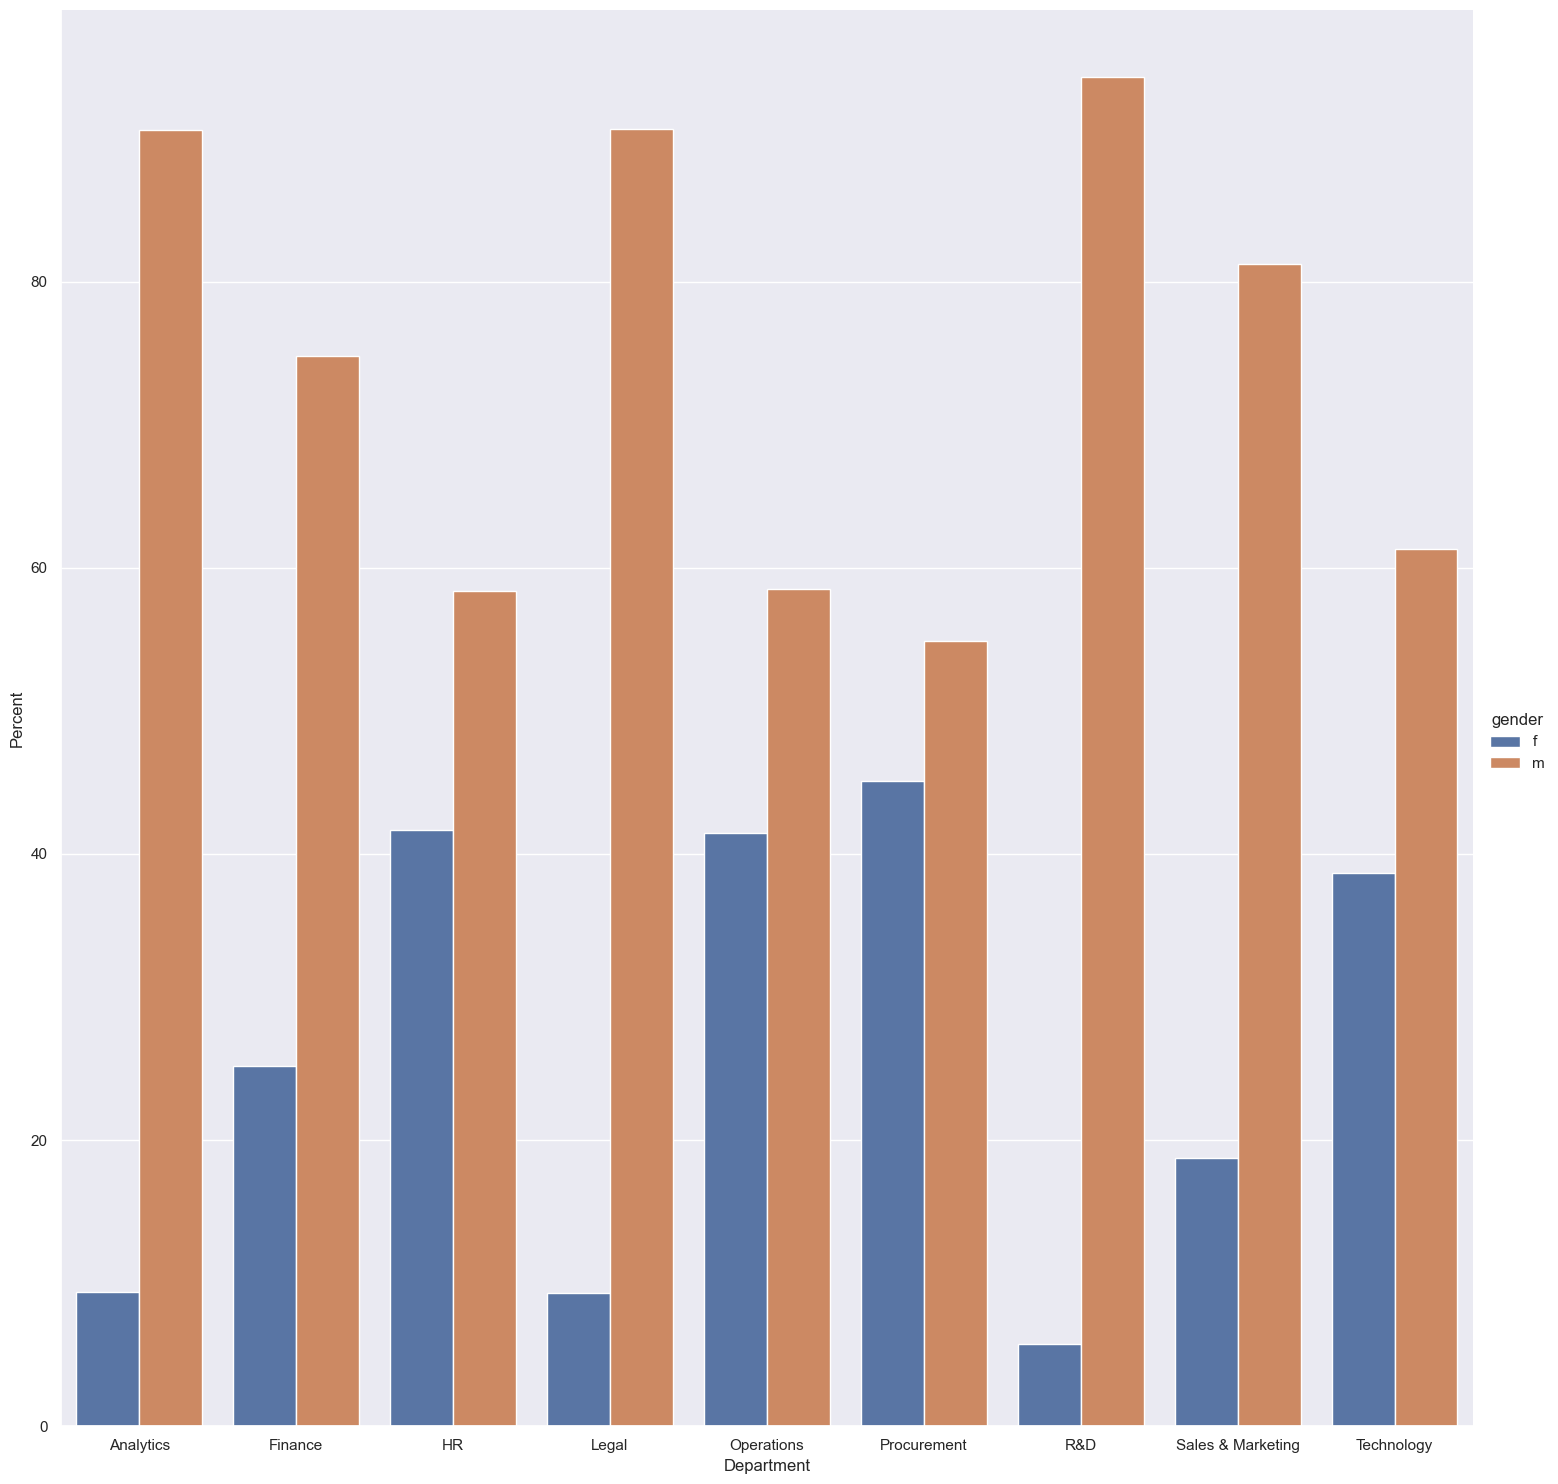

In [51]:
g = sns.catplot(data=male_vs_femaleDF, x="department", y="Gender Percentage", hue="gender", kind="bar", height=15)
g.set_axis_labels("Department", "Percent")